<center><h1>Terrorism Hotspots</h1></center>

 <i>This data project has been used as an assignment during the LGM Data Science Virtual Internship. </i>

<h2>Assignment</h2>
Imagine you are a security or defense analyst. Analyze the data and draw conclusions on the distribution and nature of terrorist incidents recorded around the world. In your analysis, include maps that visualize the location of different incidents. Your analysis may also provide answers to the following questions:

1. How has the number of terrorist activities changed over the years? Are there certain regions where this trend is different from the global averages?
2. Is the number of incidents and the number of casualties correlated? Can you spot any irregularities or outliers?
3. What are the most common methods of attacks? Does it differ in various regions or in time?
4. Plot the locations of attacks on a map to visualize their regional spread;

You are also free to explore the data further and extract additional insights other than the questions above.

<h2>Data Description</h2>
The provided compressed file globalterrorismdb_0718dist.tar.bz2 is an extract from the Global Terrorism Database (GTD) - an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

Since the number of variables and instances is very large, for this project, feel free to select a subset of columns or a specific timeframe.

<h3>Explanation of selected columns:</h3>

<ul>
  <li>Success - Success of a terrorist strike</li>
  <li>Suicide - 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide</li>
  <li>Attacktype1 - The general method of attack</li>
  <li>Attacktype1_txt - The general method of attack and broad class of tactics used</li>
  <li>Targtype1_txt - The general type of target/victim</li>
  <li>Targsubtype1_txt - The more specific target category</li>
  <li>Target1 - The specific person, building, installation that was targeted and/or victimized</li>
  <li>Natlty1_txt - The nationality of the target that was attacked</li>
  <li>Gname - The name of the group that carried out the attack</li>
  <li>Gsubname - Additional details about the group that carried out the attack like fractions</li>
  <li>Nperps - The total number of terrorists participating in the incident</li>
  <li>Weaptype1_txt - General type of weapon used in the incident</li>
  <li>Weapsubtype1_txt - More specific value for most of the Weapon Types</li>
  <li>Nkill - The number of total confirmed fatalities for the incident</li>
  <li>Nkillus - The number of U.S. citizens who died as a result of the incident</li>
</ul>


<h6> Libraries Used </h6>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<h6>Read the Data</h6>

In [38]:
df_data = pd.read_csv("globalterrorismdb_0718dist.tar.bz2", compression='bz2', usecols=lambda col: col != 'Unnamed: 0')

# Display the DataFrame without the first column.
df_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [39]:
df_data.shape

(181691, 135)

In [81]:
df_data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [46]:
for i in df_data:
    print(i,end = ', ')

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

In [98]:
df = df_data[['success','suicide','iyear','region','region_txt' ,'eventid','attacktype1','attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'target1', 'natlty1_txt','gname', 'gsubname', 'nperps','weaptype1_txt' ,'weapsubtype1_txt','nkill', 'nkillus']]
df

,success,suicide,iyear,region,region_txt,eventid,attacktype1,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,natlty1_txt,gname,gsubname,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nkillus
0,1,0,1970,2,Central America & Caribbean,197000000001,1,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Dominican Republic,MANO-D,NaN,NaN,Unknown,NaN,1.0,NaN
1,1,0,1970,1,North America,197000000002,6,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Belgium,23rd of September Communist League,NaN,7.0,Unknown,NaN,0.0,NaN
2,1,0,1970,5,Southeast Asia,197001000001,1,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,United States,Unknown,NaN,NaN,Unknown,NaN,1.0,NaN
3,1,0,1970,8,Western Europe,197001000002,3,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,United States,Unknown,NaN,NaN,Explosives,Unknown Explosive Type,NaN,NaN
4,1,0,1970,4,East Asia,197001000003,7,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,United States,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,1,0,2017,11,Sub-Saharan Africa,201712310022,2,Armed Assault,Military,Military Checkpoint,Checkpoint,Somalia,Al-Shabaab,NaN,-99.0,Firearms,Unknown Gun Type,1.0,0.0
181687,1,0,2017,10,Middle East & North Africa,201712310029,3,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Hmeymim Air Base,Russia,Muslim extremists,NaN,-99.0,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",2.0,0.0
181688,1,0,2017,5,Southeast Asia,201712310030,7,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Houses,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),NaN,-99.0,Incendiary,Arson/Fire,0.0,0.0
181689,0,0,2017,6,South Asia,201712310031,3,Bombing/Explosion,Government (General),Government Building/Facility/Office,Office,India,Unknown,NaN,-99.0,Explosives,Grenade,0.0,0.0


<ul>1.How has the number of terrorist activities changed over the years? Are there certain regions where this trend is different from the global averages?</ul>

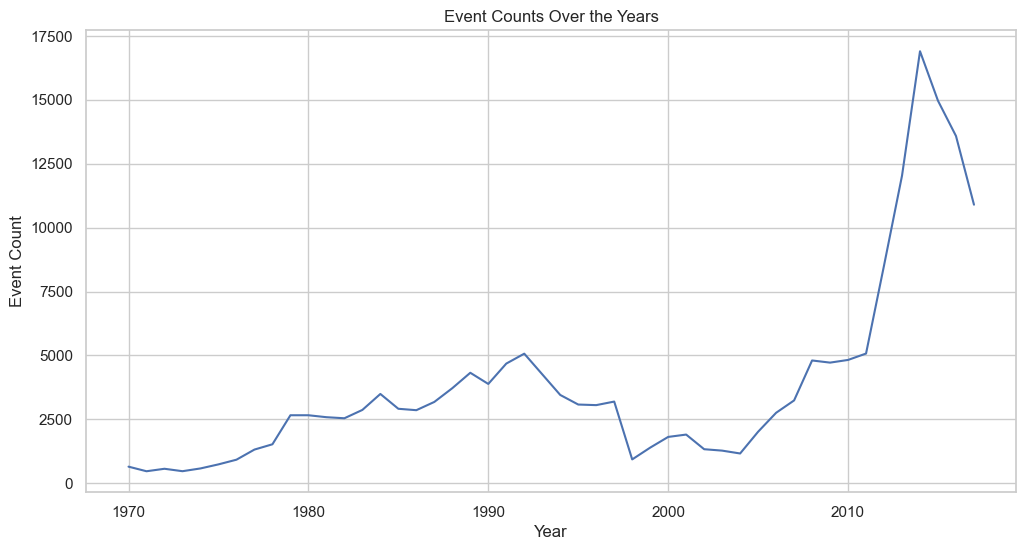

In [56]:
event_counts = df.groupby(['iyear'])['eventid'].count().reset_index()

# Create a line plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  
sns.lineplot(x='iyear', y='eventid', data=event_counts)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Event Count')
plt.title('Event Counts Over the Years')

# Show the plot
plt.show()

In [60]:
region_over_years = pd.crosstab(df.iyear,df.region_txt)
region_over_years

region_txt,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
iyear,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317
1975,0,9,0,12,0,44,159,55,4,7,12,438
1976,0,45,0,2,0,55,125,91,4,12,11,578
1977,0,24,0,4,2,211,149,119,2,8,29,771
1978,2,199,0,35,2,128,117,222,2,44,46,729


In [91]:
# Group the data by 'iyear' and 'region_txt' and count the occurrences for each group
global_count_by_year_and_region = df.groupby(['iyear', 'region_txt'])['eventid'].count().reset_index()

# Calculate the average count for each year
average_count_by_year = global_count_by_year_and_region.groupby('iyear')['eventid'].mean().reset_index()

# Print the resulting DataFrame
print(average_count_by_year)

    iyear      eventid
0    1970    59.181818
1    1971    47.100000
2    1972    56.800000
3    1973    43.000000
4    1974    52.818182
5    1975    82.222222
6    1976   102.555556
7    1977   131.900000
8    1978   138.727273
9    1979   242.000000
10   1980   242.000000
11   1981   235.090909
12   1982   231.272727
13   1983   287.000000
14   1984   317.727273
15   1985   265.000000
16   1986   260.000000
17   1987   289.363636
18   1988   338.272727
19   1989   393.090909
20   1990   353.363636
21   1991   390.250000
22   1992   422.583333
23   1994   288.000000
24   1995   256.750000
25   1996   254.833333
26   1997   266.416667
27   1998    77.833333
28   1999   116.250000
29   2000   151.166667
30   2001   158.833333
31   2002   111.083333
32   2003   106.500000
33   2004   106.000000
34   2005   183.363636
35   2006   229.833333
36   2007   294.727273
37   2008   436.818182
38   2009   393.416667
39   2010   402.166667
40   2011   461.454545
41   2012   774.727273
42   2013  

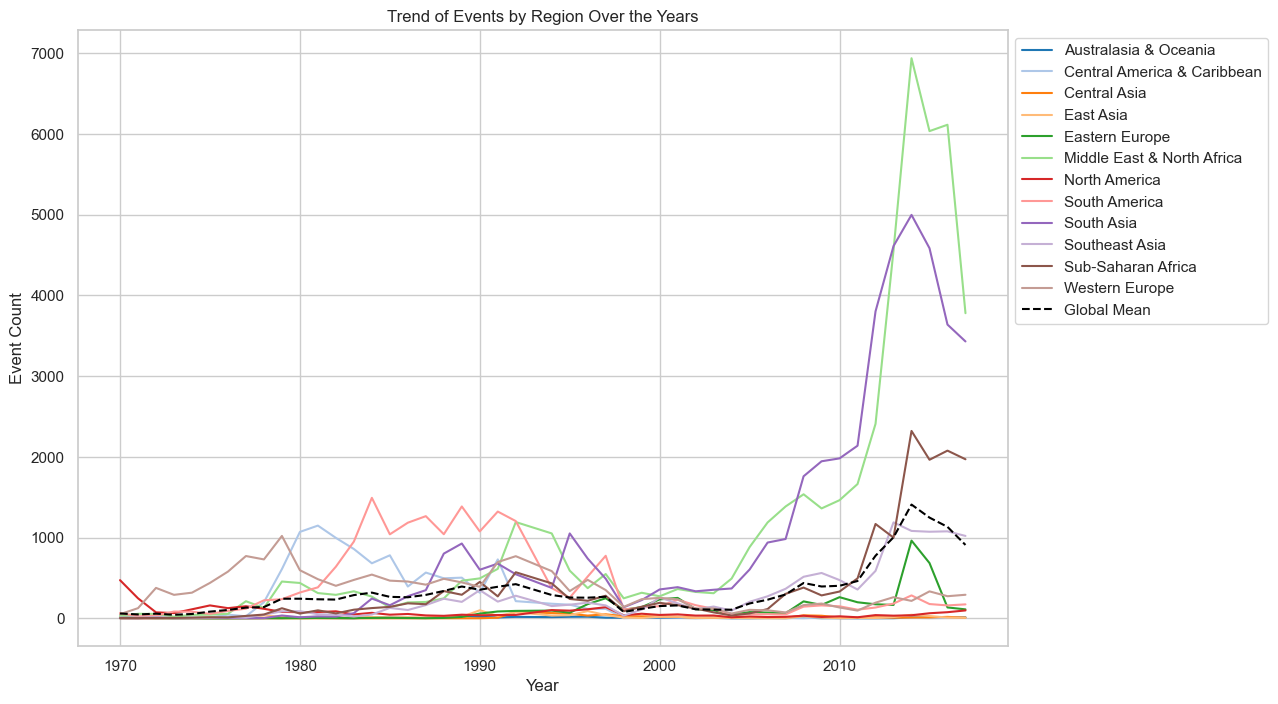

In [95]:
# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Define a list of regions to loop through
regions = ['Australasia & Oceania', 'Central America & Caribbean', 'Central Asia', 'East Asia',
           'Eastern Europe', 'Middle East & North Africa', 'North America', 'South America',
           'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe']

# Create a color palette for the regions
colors = sns.color_palette("tab20", len(regions))

# Create a trend chart using Seaborn lineplot for each region
for i, region in enumerate(regions):
    sns.lineplot(data=region_over_years, x='iyear', y=region, label=region, color=colors[i])

# Add the global mean as a lineplot
sns.lineplot(data=average_count_by_year, x='iyear', y='eventid', label='Global Mean', color='black', linestyle='dashed')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Event Count')
plt.title('Trend of Events by Region Over the Years')

# Customize the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


<ul>2. Is the number of incidents and the number of casualties correlated? Can you spot any irregularities or outliers?</ul>

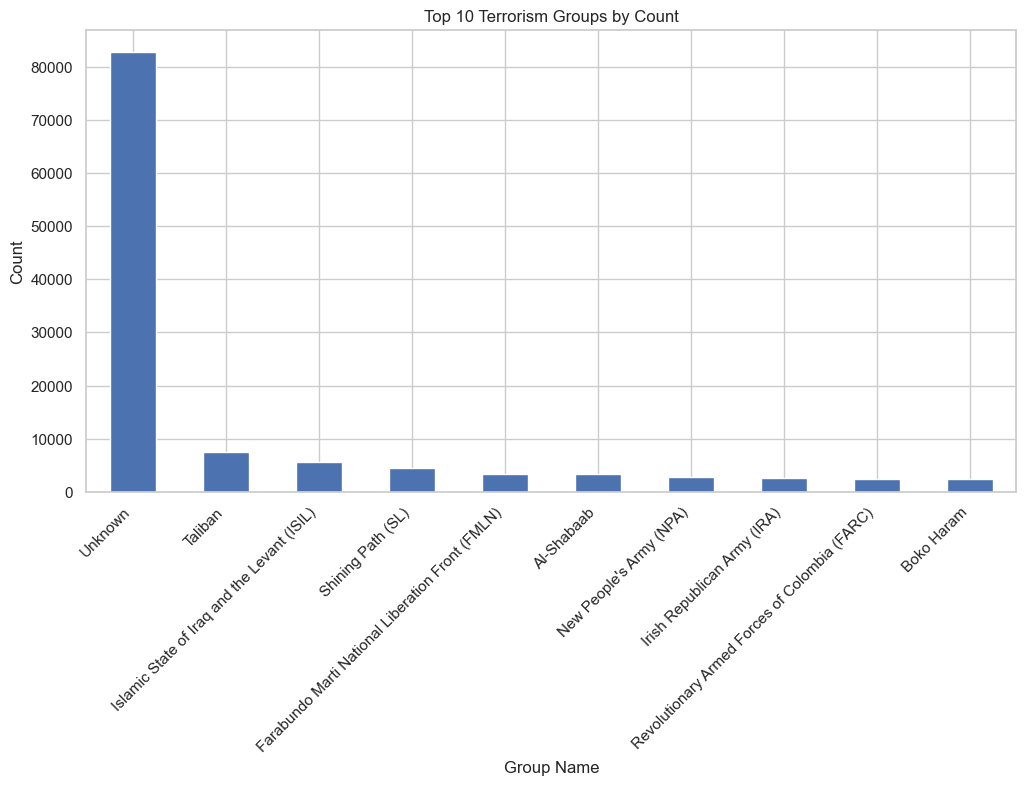

In [115]:
top_10_groups = df['gname'].value_counts().head(10)

# Create a bar plot for the top 10 'gname' values
plt.figure(figsize=(12, 6))
top_10_groups.plot(kind='bar')
plt.title('Top 10 Terrorism Groups by Count')
plt.xlabel('Group Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

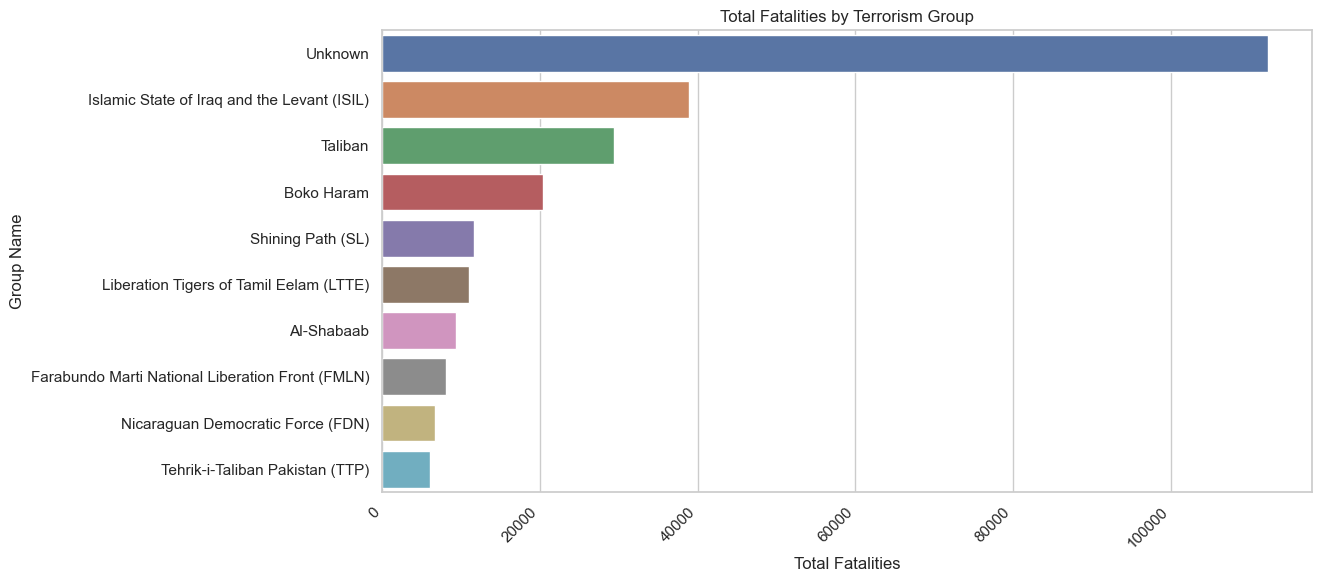

In [125]:
Top10_Gname = df.groupby('gname')['nkill'].sum()

# Sort the result in ascending order by the total sum of 'nkill'
sorted_data = Top10_Gname.sort_values(ascending=False)[:10]

# Create a bar plot for the total sum of 'nkill' for each group using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_data.values, y=sorted_data.index, orient='h')
plt.title('Total Fatalities by Terrorism Group')
plt.xlabel('Total Fatalities')
plt.ylabel('Group Name')
plt.xticks(rotation=45, ha='right')
plt.show()

In [137]:
total_fatalities = df.groupby('gname')['nkill'].sum()

# Sort the result in ascending order by the total sum of 'nkill' and take the top 10
top_10_groups = total_fatalities.sort_values(ascending=False).head(10)

# Calculate the count of occurrences of each group
group_counts = df['gname'].value_counts().reset_index()
group_counts.columns = ['gname', 'count']

# Merge the two DataFrames based on the 'gname' column and include only the top 10 groups
merged_data = pd.merge(top_10_groups, group_counts, on='gname')

# Print the resulting merged DataFrame
print(merged_data)

                                              gname     nkill  count
0                                           Unknown  112367.0  82782
1       Islamic State of Iraq and the Levant (ISIL)   38923.0   5613
2                                           Taliban   29410.0   7478
3                                        Boko Haram   20328.0   2418
4                                 Shining Path (SL)   11601.0   4555
5           Liberation Tigers of Tamil Eelam (LTTE)   10989.0   1606
6                                        Al-Shabaab    9330.0   3288
7  Farabundo Marti National Liberation Front (FMLN)    8065.0   3351
8                 Nicaraguan Democratic Force (FDN)    6662.0    895
9                   Tehrik-i-Taliban Pakistan (TTP)    6042.0   1351


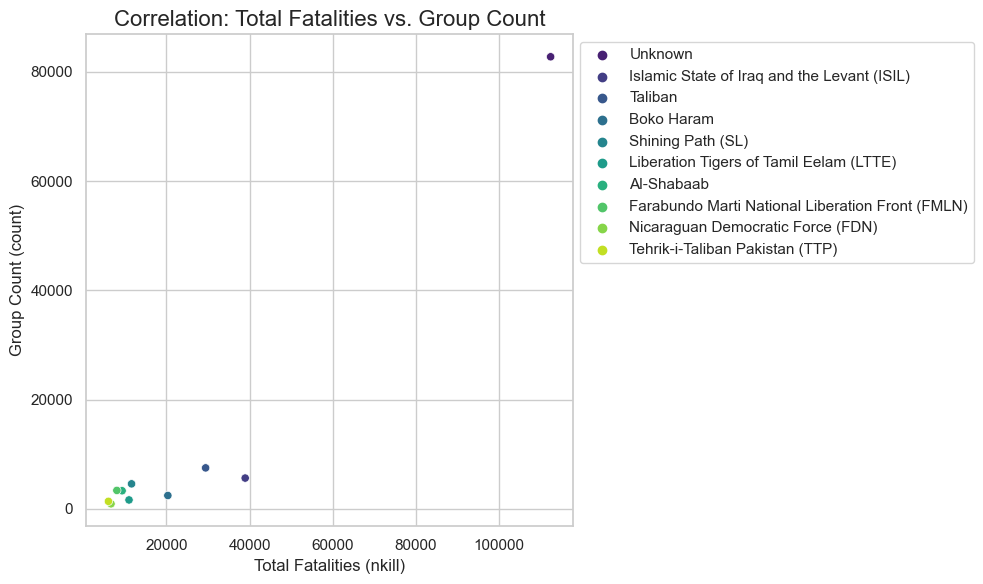

In [143]:
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.set_style("whitegrid")  # Set a white grid background

# Create the scatter plot
scatter = sns.scatterplot(data=merged_data, x='nkill', y='count', hue='gname', palette='viridis')

# Customize the title and labels
plt.title('Correlation: Total Fatalities vs. Group Count', fontsize=16)
plt.xlabel('Total Fatalities (nkill)', fontsize=12)
plt.ylabel('Group Count (count)', fontsize=12)

# Adjust the legend
scatter.legend(title='Group Name', title_fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

<ul>3. What are the most common methods of attacks? Does it differ in various regions or in time?</ul>

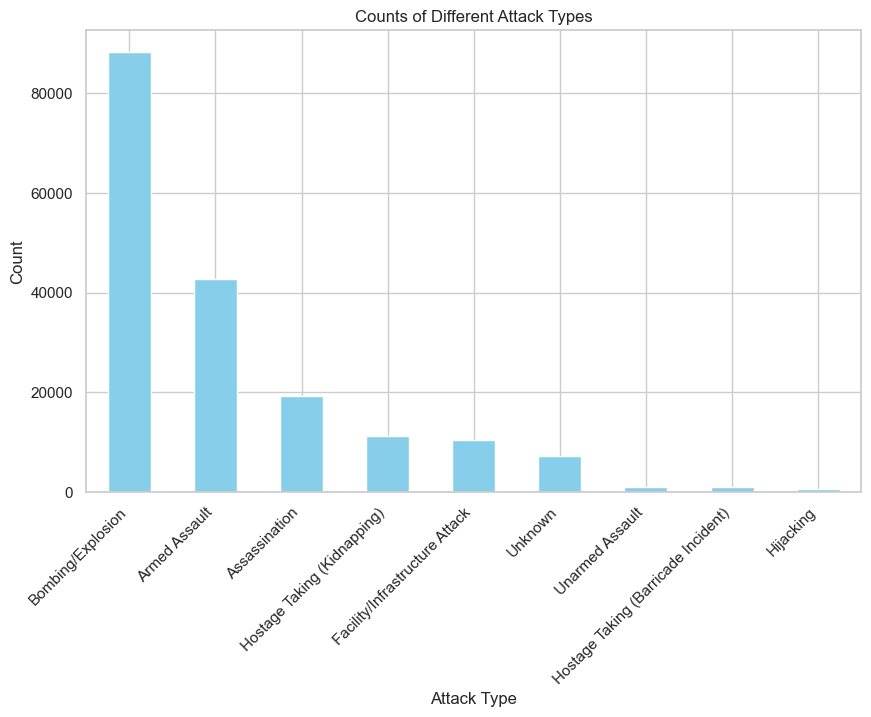

In [154]:
attack_type_counts = df['attacktype1_txt'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
attack_type_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Different Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [152]:
common_methods_by_region = df.groupby('region_txt')['attacktype1_txt'].value_counts().groupby('region_txt').head(1)

# Print the most common methods in each region
print("\nMost common attack methods by region:")
print(common_methods_by_region)


Most common attack methods by region:
region_txt                   attacktype1_txt  
Australasia & Oceania        Bombing/Explosion       75
Central America & Caribbean  Armed Assault         4361
Central Asia                 Bombing/Explosion      235
East Asia                    Bombing/Explosion      330
Eastern Europe               Bombing/Explosion     2766
Middle East & North Africa   Bombing/Explosion    30908
North America                Bombing/Explosion     1534
South America                Bombing/Explosion     9039
South Asia                   Bombing/Explosion    21246
Southeast Asia               Bombing/Explosion     4818
Sub-Saharan Africa           Armed Assault         6004
Western Europe               Bombing/Explosion     8508
Name: attacktype1_txt, dtype: int64


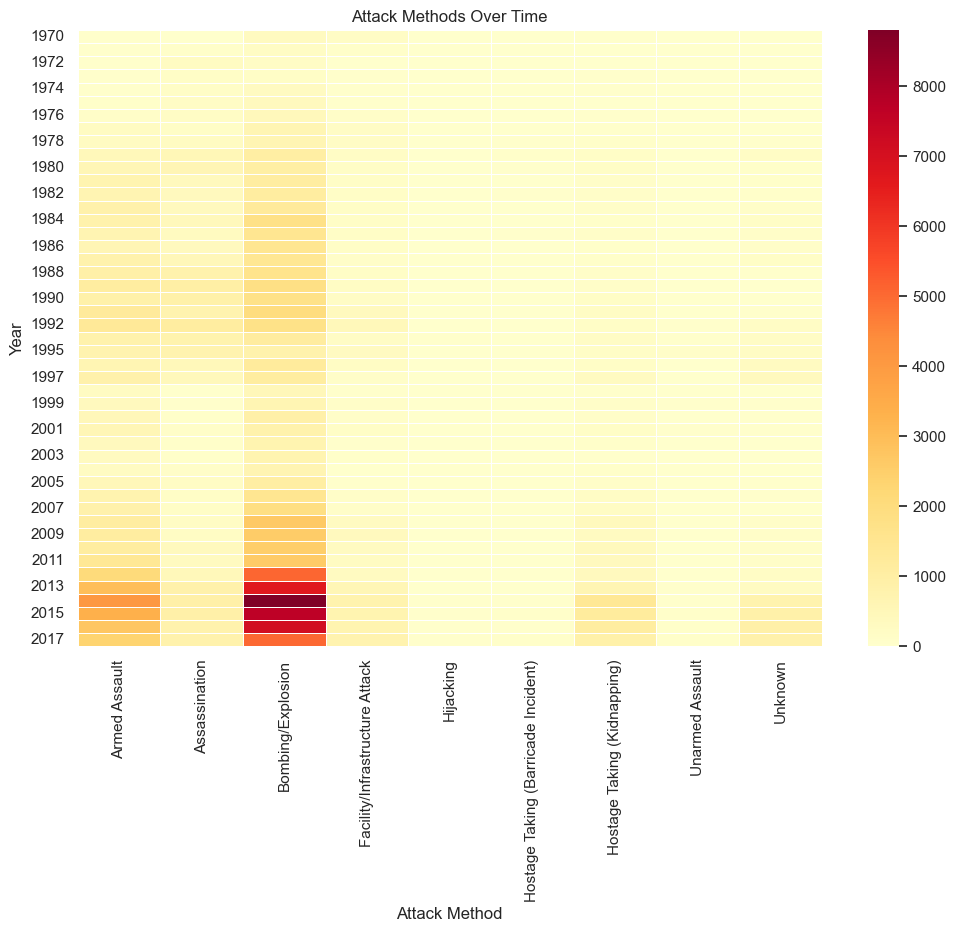

In [153]:
attack_methods_over_time = df.groupby(['iyear', 'attacktype1_txt']).size().unstack(fill_value=0)

# Plot the trends using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(attack_methods_over_time, cmap='YlOrRd', linewidths=0.5)
plt.title('Attack Methods Over Time')
plt.xlabel('Attack Method')
plt.ylabel('Year')
plt.show()

<ul>4. Plot the locations of attacks on a map to visualize their regional spread;</ul>

In [167]:
df.groupby('natlty1_txt')['gname'].value_counts()

natlty1_txt  gname                                
Afghanistan  Taliban                                  6565
             Unknown                                  3942
             Khorasan Chapter of the Islamic State     225
             Haqqani Network                            49
             Hizb-I-Islami                              29
                                                      ... 
Zimbabwe     Guerrillas                                  1
             Gunmen                                      1
             Liberation War Veterans Association         1
             National Youth Service of Zimbabwe          1
             South African guerrillas                    1
Name: gname, Length: 6801, dtype: int64